#Assignment - 1 (65 pts)

###Due: 11:59 PM CT, September 7 

### Members: Aniket Patil, Prathmesh Savale
---



# Question 1: Adoption of AI/ML (5 pts)

Read the HBR article on barriers to adoption of AI/ML based solutions in the healthcare industry, which is posted as the first document in Canvas under Modules --> Resources.

Write a paragraph in your own words summarizing what you feel were the key factors that contributed to the lack of trust (and hence adoption) of the AI/ML solutions discussed. 

* The recurring theme that contributed to the lack of trust and subsequent adoption of AI/ML solutions is that the patients felt the diagnosis and recommendations of the AI providers were not idiosyncratic and did not cater to their personal problem. The patients felt being treated as an average or a statistic without considering their unique characteristics and medical history.
* Moreover, certain surveys and studies also highlight that people are comfortable utilizing medical AI if a physician remains incharge of the final decision, which also establishes a lack of trust among patients when using an end to end AI driven solution in healthcare.
* The extent of their mistrust was such that patients were willing to pay more to switch to a human doctor.
* The patients feel that the diagnosis is more reliable when a human is involved in the process.


# Question 2: Google Flu Trends (8 pts)

The second article posted  in Canvas under Modules --> Resources, (google flu) describes a high-profile (and embarrassingly  failed)  project done by google, highlighting the phenomena of data drift and the importance of continually monitoring/updating models post deployment.

Read this article and then briefly describe 

(i) three important causes of "data drift" in the flu prediction problem that are mentioned in the article, and

**1. Media-stoked panic**
A media-stoked panic in the last flu season might have skewed the predictions since people would be searching for flu related terms solely because media is talking about it.

**2. Ongoing evaluation and improvement**
The GFT could have been continuously monitored and tweaked as needed, periodically. This would ensure any new emerging trends or changed patterns are captured in new GFT versions.

**3. Changes in Google's search algorithm (Blue team dynamics)**
Changes in search algorithm would affect the searching behaviour of users. For e.g., Google had modified its search results to suggest additional search terms, and later included potential diagnoses for searches including physical symptoms. This would alter the way that users perform searches.

(ii) one important aspect of the original google model design that made it very prone to overfitting (and hence poor generalization on future data).

**They were training on very few data points and trying to predict a large number of data points. The result was that the original Google model had high chances of finding search terms that are typical of flu but are unrelated. Such matching search terms do not contribute to predictive power of the model and makes the design prone to overfitting.**

# Question 3: Maximum Likelihood Estimate (12 pts)

100 students in the MSBA Program were asked if they wanted to buy the Big Ticket for the season. They reported their preferences by entering No or Yes in the survey. We use 0 to represent their disinterest in buying the Big Ticket and 1 to represent their interest. A random sample of 30 students yielded the following preferences:

$$0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1$$

These choices are assumed to arise by independent and identically distributed (i.i.d.) sampling from the following distribution and if the unknown parameter $q$ can be estimated, then we can provide more insights about the students' preference.

$$
\begin{equation}
\nonumber P(x) = \left\{
\begin{array}{l l}
    q& \quad \text{for  } x=0\\
1-q & \quad \text{for } x=1
\end{array} \right.
\end{equation}
$$


1. Based on the definitions given above, write down the likelihood function (3 pts)
2. Derive the **maximum likelihood estimator** of $q$ (Algenric expression in terms of variables) (3 pts)
3. Using the given sample, find a maximum likelihood estimate of $q$ as well (numerical value) (3 pts)
4. Show that the maximum likelihood estimate is unbiased (3 pts)

Note: For this question, you can either upload a scanned copy of the handwritten solution or write the answer in LaTex/Markdown.


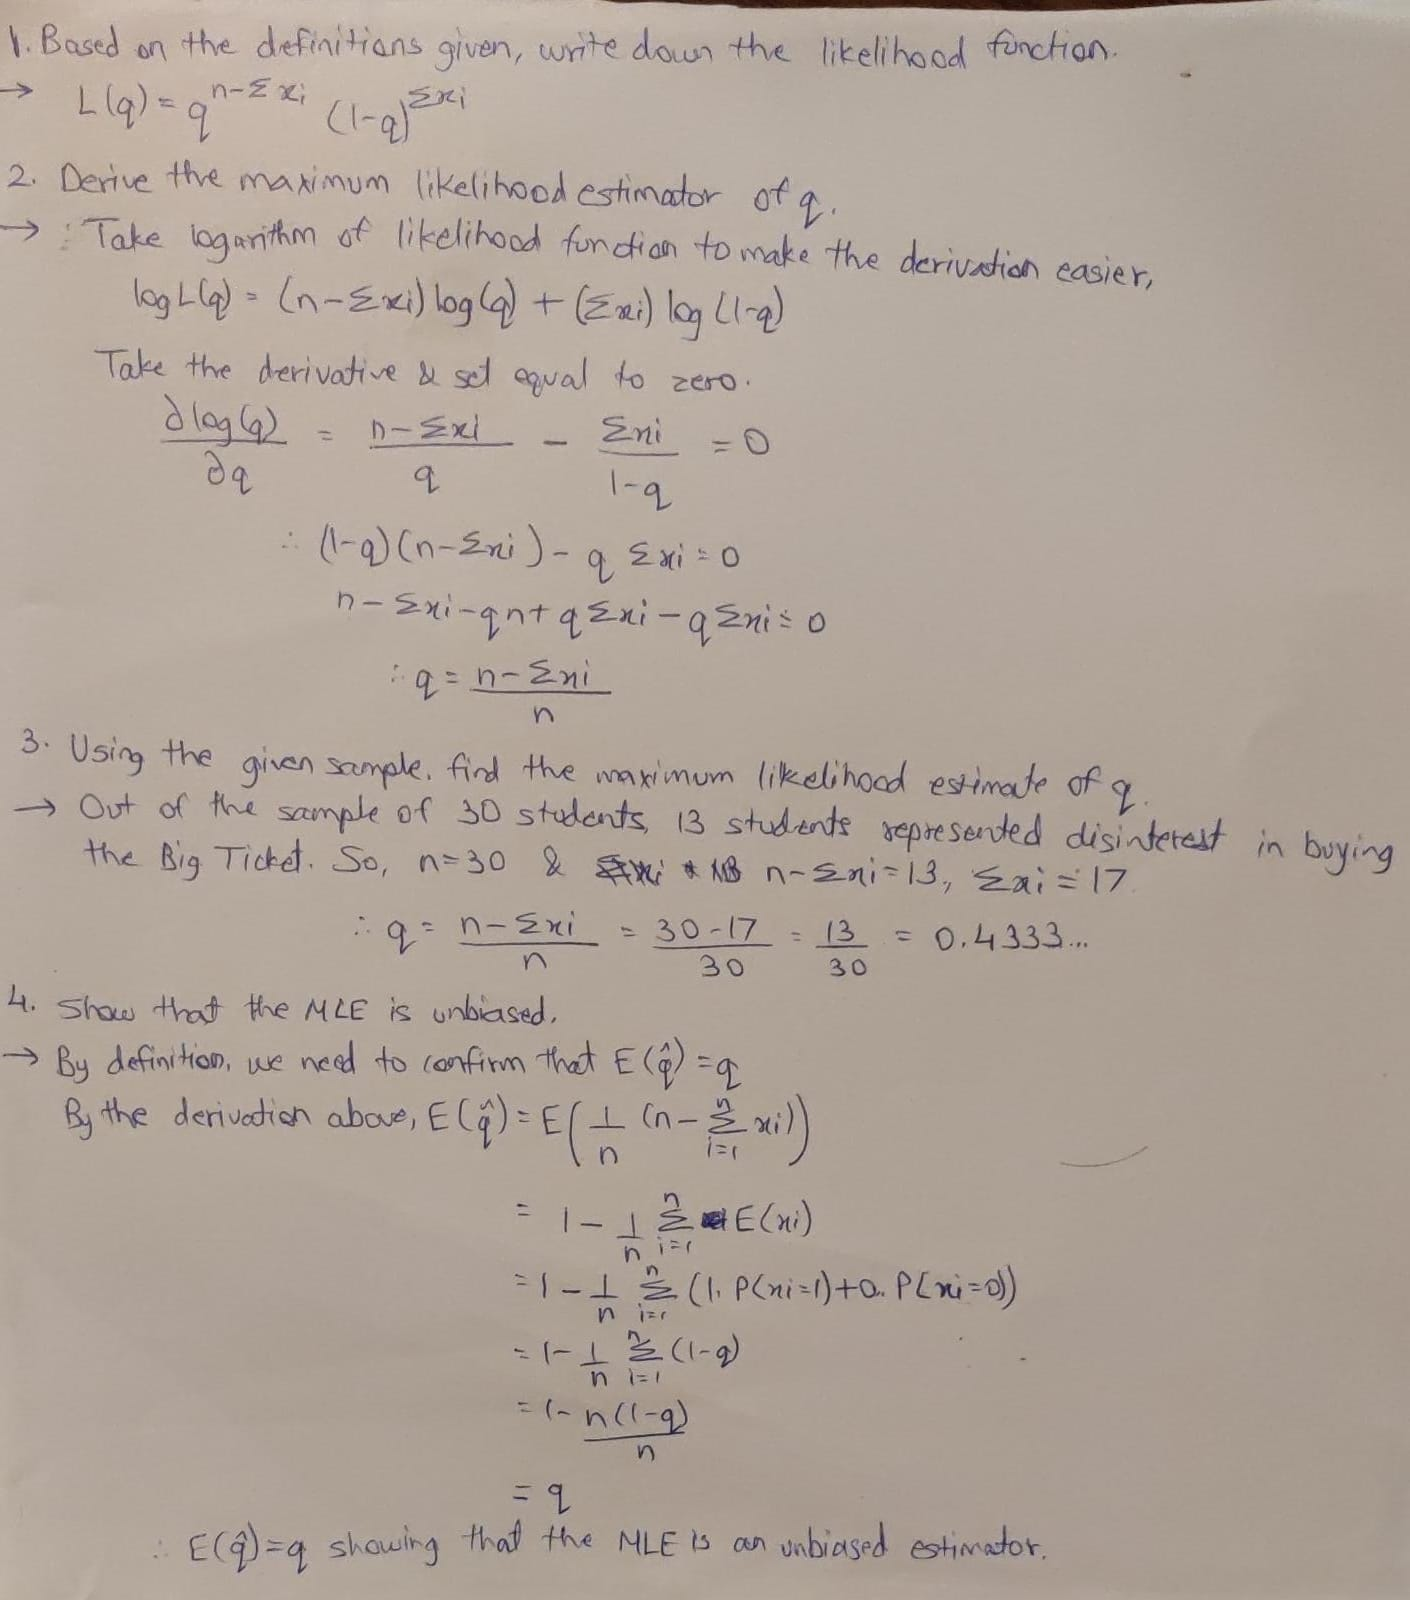

# Question 4: Linear Regression (10 pts)

1. What is the difference between R-square and adjusted R square and why is it desirable to use the adjusted value? (4 pts)

**R-squared value measures the amount of variance in the dependent variable explained by the independent variables. R2 increases with every predictor added to a model. As R2 always increases and never decreases, it can appear to be a better fit with the more features you add to the model. Adjusted-R^2 is a modification of R^2 and it accomodates for the number of independent variables. The adjusted R2 will penalize you for adding independent variables (K in the equation) that do not fit the model. The adjusted-R^2 will only increase if the independent variables improve the accuracy of the model.**

2. Overfitting usually happens in complex models. Linear Regression is a fairly simple model. Could overfitting happen in Linear Regression? If so, please explain the scenario in which it could happen and how we can tackle it. (6 pts)

**Overfitting can happen in Linear Regression when the number of independent variables is larger than the sample size. It can be tackled by using regularization, eg. lasso regression will eliminate all the variables that are not siginificant. Another way to tackle this scenario is to use dimensionality reduction techniques like PCA before performing linear regression.**


# Question 5: Ridge/ Lasso Regression (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. We have removed the categorical variables and rows with missing variables to make it easier to run the models.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity (this feature has been removed from the csv file since it is an ordinal variable)

In [2]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random
from sklearn import linear_model
pd.options.mode.chained_assignment = None
import sklearn


df = pd.read_csv("housing_data.csv")
X = df.drop(['median_house_value'],axis=1)
Y = df['median_house_value']

In [4]:
df.columns # Show you all the columns in this file

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
df.head() # Show you the first 5 rows in this file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


1) Split the data into a training set (75% of data) and a test set (25% of data), using the train_test_split function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the sklearn.preprocessing.scale function for this. Print the first 5 rows of the training set after scaling. (2 pts) 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler

In [7]:
X = df.loc[:, df.columns != 'median_house_value']
y = df.loc[:,df.columns == 'median_house_value']

In [8]:
# splitting data into train and test
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.25, random_state = 50)
train_X.shape, test_X.shape

((15324, 8), (5109, 8))

In [9]:
# scaling train and test data
standard_scalar = StandardScaler()
train_X_scalar = standard_scalar.fit(train_X)
train_X_scaled = train_X_scalar.transform(train_X)
test_X_scaled = train_X_scalar.transform(test_X)

In [10]:
# checking for unit variance and 0 mean
pd.DataFrame(train_X_scaled).describe()

,0,1,2,3,4,5,6,7
count,1.532400e+04,1.532400e+04,1.532400e+04,1.532400e+04,1.532400e+04,1.532400e+04,1.532400e+04,1.532400e+04
mean,-7.860240e-16,-9.558901e-16,1.227809e-16,-2.286815e-17,4.105059e-17,-1.475081e-17,-4.932393e-17,1.927966e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.382754e+00,-1.447914e+00,-2.196651e+00,-1.209129e+00,-1.280018e+00,-1.268658e+00,-1.313451e+00,-1.776576e+00
25%,-1.111191e+00,-7.985710e-01,-8.467997e-01,-5.451764e-01,-5.783731e-01,-5.705279e-01,-5.797030e-01,-6.888892e-01
50%,5.343616e-01,-6.444104e-01,2.663348e-02,-2.334877e-01,-2.455111e-01,-2.286416e-01,-2.326960e-01,-1.733367e-01
75%,7.787012e-01,9.766118e-01,6.618576e-01,2.358896e-01,2.597686e-01,2.660168e-01,2.758944e-01,4.613806e-01
max,2.623714e+00,2.947999e+00,1.852903e+00,1.628186e+01,1.181894e+01,3.074572e+01,1.242909e+01,5.891114e+00


2) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a 5-fold cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from $α = 10^{10}$ to $α = 10^{−6}$.

In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen α based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using MSE as the scoring metric. (5 pts) 

In [11]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [12]:
# considering the alphas in an increasing order for more interpretability
alphas = 10**np.linspace(-6,10,100)

In [13]:
folds = KFold(n_splits=5, random_state=None, shuffle=False)

In [14]:
neg_mse_vals_lasso = []
neg_mse_vals_ridge = []
for alpha in alphas:

    results_lasso = cross_validate(
        Lasso(alpha = alpha), train_X_scaled, train_y, scoring='neg_mean_squared_error', cv=folds, 
        return_train_score = True)
    
    results_ridge = cross_validate(
        Ridge(alpha = alpha), train_X_scaled, train_y, scoring='neg_mean_squared_error', cv=folds, 
        return_train_score = True)
    
    neg_mse_vals_lasso.append(results_lasso['test_score'].mean())
    neg_mse_vals_ridge.append(results_ridge['test_score'].mean())

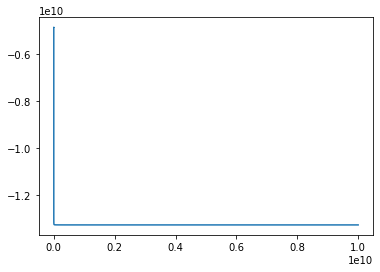

In [15]:
plt.plot(alphas, neg_mse_vals_ridge)

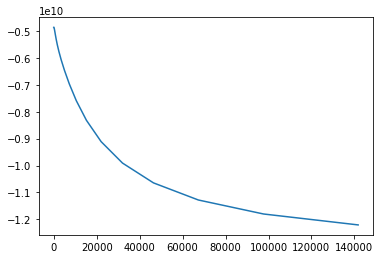

In [16]:
# alpha ~18 gives a decent -ve MSE, increasing alpha beyond this points gives dimishing results
plt.plot(alphas[:70], neg_mse_vals_ridge[:70])

In [17]:
max(list(zip(alphas, neg_mse_vals_ridge)), key=lambda x: x[1])

(18.738174228603867, -4856173328.5055065)

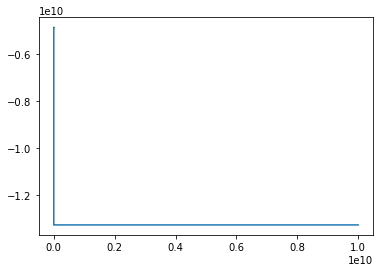

In [18]:
# not interpretable
plt.plot(alphas, neg_mse_vals_lasso)

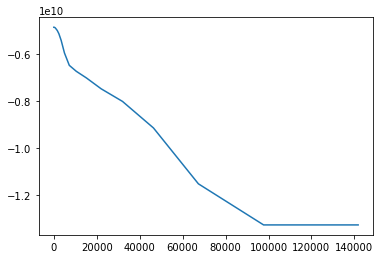

In [19]:
# alpha of ~57 gives a decent -ve MSE for Lasso, increasing alpha beyond this points gives dimishing results
plt.plot(alphas[:70], neg_mse_vals_lasso[:70])

In [20]:
max(list(zip(alphas, neg_mse_vals_lasso)), key=lambda x: x[1])

(57.223676593502205, -4856422488.082949)

3) a) Run ridge and lasso regression for all of the α specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors (5 pts).

  b) What do you qualitatively observe when the value of the regularization parameter changes? (2pts)

In [21]:
coeff_vals_lasso = []
coeff_vals_ridge = []
for alpha in alphas:

    lasso_fit = Lasso(alpha=alpha).fit(train_X_scaled, train_y)
    
    ridge_fit = Ridge(alpha=alpha).fit(train_X_scaled, train_y)

    coeff_vals_lasso.append(lasso_fit.coef_)
    coeff_vals_ridge.append(ridge_fit.coef_[0])

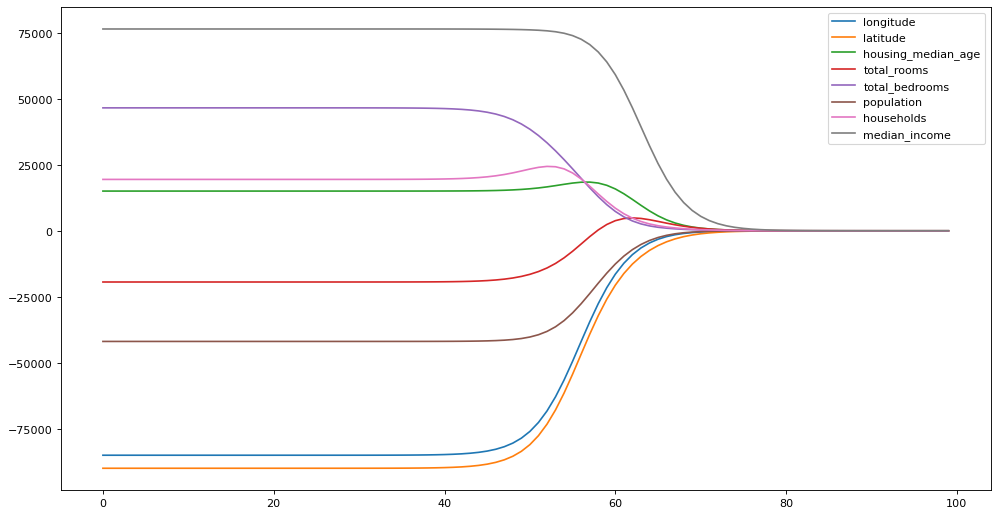

In [22]:
figure(figsize=(15, 8), dpi=80)
plt.plot(coeff_vals_ridge)
plt.legend(train_X.columns.values)

**As the value of the regularization parameter increases the magnitude of beta coefficients decreases. For Ridge the beta coefficients decreases significantly with the increase in alpha. For lasso regression the beta coefficients become zero for a high value of alpha. The effect of the independent variables corresponding to the beta values that become zero is removed from the model.**


4) a) Similarly, use sklearn.linear_model.ElasticNet to do linear regression with different α values, and plot the coefficients learned for each of them (2 pts).

  b) Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models. (3pts)

In [23]:
from sklearn.linear_model import ElasticNet

coeff_vals_elasticnet = []
for alpha in alphas:
    elastic_fit = ElasticNet(alpha=alpha).fit(train_X_scaled, train_y)
    coeff_vals_elasticnet.append(elastic_fit.coef_)

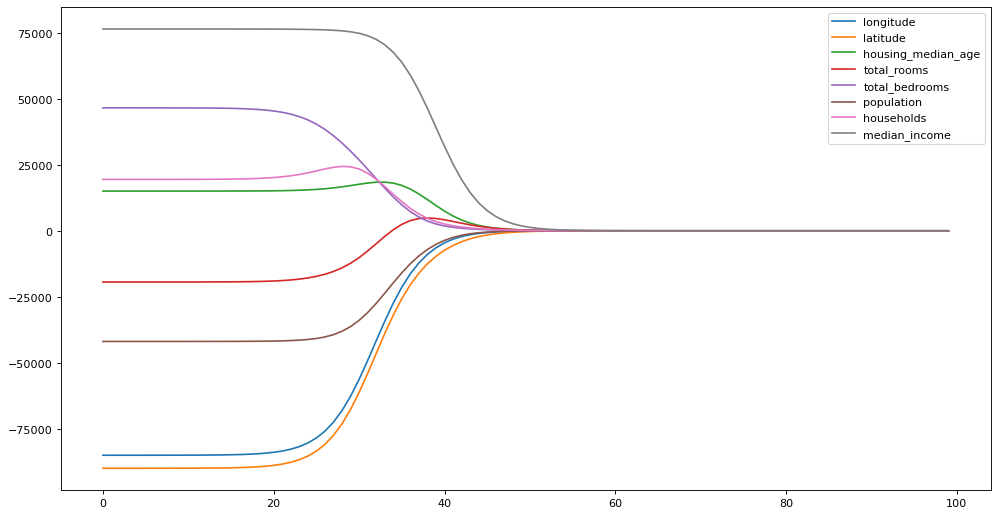

In [24]:
figure(figsize=(15, 8), dpi=80)
plt.plot(coeff_vals_elasticnet)
plt.legend(train_X.columns.values)

**ridge:**

pros - it introduces regularization and can help reduce overfitting

cons - it cannot be used for feature selection as it only minimzes the betas but does not change them to zeros
    
**lasso:**

pros - it can be used for feature reduction, as it can change the betas to zero by using the L1 norm

cons - in case of high multicollinearity between 2 variables, it will randomly eliminate either of the 2 variables, this reduces interpretability

**elasticnet:**

pros - it uses both L1 and L2 norm ans overcomes the issue with lasso

cons - computationally expensive as it will need to be tuned to get the best alpha value for both L1 and L2 norm

5) Run the following three regression models with MSE loss on the training data (5 pts): 

a) linear regression without regularization (1pts)

b) linear regression with ridge regularization (2pts)

c) linear regression with lasso regularization (2pts)


In [25]:
# linear regression without regularization (1pts)
from sklearn.linear_model import LinearRegression

print('Linear regression MSE on train')
lin_fit = LinearRegression().fit(train_X_scaled, train_y)
print(mean_squared_error(train_y, lin_fit.predict(train_X_scaled)))


print('\nRidge MSE on train')
ridge_fit = Ridge(alpha=18).fit(train_X_scaled, train_y)
print(mean_squared_error(train_y, ridge_fit.predict(train_X_scaled)))


print('\nLasso MSE on train')
lasso_fit = Lasso(alpha=57).fit(train_X_scaled, train_y)
print(mean_squared_error(train_y, lasso_fit.predict(train_X_scaled)))

Linear regression MSE on train
4831534611.158463

Ridge MSE on train
4831924408.835897

Lasso MSE on train
4831776563.388586


In [26]:
# For part (b) and (c), use only the best regularization parameters. 
# Report the MSE and R2 on the test data for each of the models.

print('Test linear MSE is',mean_squared_error(test_y, lin_fit.predict(test_X_scaled)),
      'Test linear r2 is', r2_score(test_y, lin_fit.predict(test_X_scaled)))

print('Test ridge MSE is',mean_squared_error(test_y, ridge_fit.predict(test_X_scaled)),
      'Test ridge r2 is', r2_score(test_y, ridge_fit.predict(test_X_scaled)))

print('Test lasso MSE is',mean_squared_error(test_y, lasso_fit.predict(test_X_scaled)),
      'Test lasso r2 is', r2_score(test_y, lasso_fit.predict(test_X_scaled)))

Test linear MSE is 4861014374.694436 Test linear r2 is 0.6384697484766777
Test ridge MSE is 4862528870.88768 Test ridge r2 is 0.6383571102190078
Test lasso MSE is 4861063090.504511 Test lasso r2 is 0.6384661253153965


6) Train the 3 models and report metrics with the original data without scaling (3pts)

In [34]:
# finding optimal alpha for unscaled data
neg_mse_vals_lasso = []
neg_mse_vals_ridge = []
for alpha in alphas:

    results_lasso = cross_validate(
        Lasso(alpha = alpha), train_X, train_y, scoring='neg_mean_squared_error', cv=folds, 
        return_train_score = True)
    
    results_ridge = cross_validate(
        Ridge(alpha = alpha), train_X, train_y, scoring='neg_mean_squared_error', cv=folds, 
        return_train_score = True)
    
    neg_mse_vals_lasso.append(results_lasso['test_score'].mean())
    neg_mse_vals_ridge.append(results_ridge['test_score'].mean())

In [35]:
# optimal alpha for unscaled train data for ridge
max(list(zip(alphas, neg_mse_vals_ridge)), key=lambda x: x[1])

(1e-06, -4856700377.755208)

In [36]:
# optimal alpha for unscaled train data for lasso
max(list(zip(alphas, neg_mse_vals_lasso)), key=lambda x: x[1])

(1e-06, -4856700377.755155)

In [33]:
from sklearn.linear_model import LinearRegression

print('Linear regression MSE on train')
lin_fit = LinearRegression().fit(train_X, train_y)
print(mean_squared_error(train_y, lin_fit.predict(train_X)))
print('Linear regression R^2 on train')
print(r2_score(train_y, lin_fit.predict(train_X)))


print('\nRidge MSE on train')
ridge_fit = Ridge(alpha=1e-06).fit(train_X, train_y)
print(mean_squared_error(train_y, ridge_fit.predict(train_X)))
print('Ridge R^2 on train')
print(r2_score(train_y, ridge_fit.predict(train_X)))


print('\nLasso MSE on train')
lasso_fit = Lasso(alpha=1e-06).fit(train_X, train_y)
print(mean_squared_error(train_y, lasso_fit.predict(train_X)))
print('Lasso R^2 on train')
print(r2_score(train_y, lasso_fit.predict(train_X)))

Linear regression MSE on train
4831534611.158461
Linear regression R^2 on train
0.6362272647678573

Ridge MSE on train
4831534611.158463
Ridge R^2 on train
0.6362272647678572

Lasso MSE on train
4831534611.158461
Lasso R^2 on train
0.6362272647678573


7) Why did we have to scale the data in ridge and lasso regression? (3 pts)



**Ridge and lasso regression penalizes the beta coefficients. Shrinking of the beta coefficients will depend on the magnitude of the associated independent variable. If the magnitude is not uniform the shrinkage will not be uniform. Therefore it is neccessary to scale the independent variables.**